# Phase 3 (SQL Operations)

#### Problem Statements :

3.1	Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

3.5	Write SQL query to find the highest number of dacoity/robbery in which district.

3.6	Write SQL query to find in which districts(All) the lowest number of murders happened

3.7	Write SQL query to find the number of murders in ascending order in district and yearwise.

3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

3.8.2	Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

3.8.3	Store the above data (the result of 3.8.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

3.8.4	Use appropriate graphs to show your data (the result of 3.8.3)

#### Importing necessary libraries

In [1]:
import sqlite3
import csv
import pandas as pd

## 3.1 Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

In [4]:
conn = sqlite3.connect('crime_database.db')
conn.execute("DROP TABLE IF EXISTS crime_against_women")
#creating table
conn.execute('''CREATE TABLE crime_against_women
             (STATE_UT TEXT,DISTRICT TEXT,Year INT,Rape INT,Kidnapping INT,Dowry_Deaths INT,Assault INT,Insult  INT,Cruelty_by_Husband  INT,Importation_of_Girls INT)''')

In [5]:
with open('C:\\Users\\rashm\\Desktop\\42_District_wise_crimes_committed_against_women_2001_2012.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Insert data into the table
        conn.execute("INSERT INTO crime_against_women (STATE_UT, DISTRICT,Year,Rape,Kidnapping,Dowry_Deaths,Assault,Insult,Cruelty_by_Husband,Importation_of_Girls) VALUES (?, ?,?,?,?,?,?,?,?,?)",
                     (row['STATE/UT'], row['DISTRICT'],row['Year'],row['Rape'],row['Kidnapping and Abduction'],row['Dowry Deaths'],row['Assault on women with intent to outrage her modesty'],row['Insult to modesty of Women'],row['Cruelty by Husband or his Relatives'],row['Importation of Girls']))

In [6]:
conn.commit

<function Connection.commit>

#### New table "crime_against_women" created and data inserted into the table.

## 3.2 Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

### Highest Rapes :

In [11]:
result=conn.execute("SELECT  STATE_UT, DISTRICT ,Year ,MAX(Rape)  FROM crime_against_women WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY Year ORDER BY Rape DESC LIMIT 1")
for row in result:
    print(row)

('WEST BENGAL', 'MURSHIDABAD', 2009, 568)


#### The highest number of 'rapes' happend in the State  'WEST BENGAL', District 'MURSHIDABAD'  in the year '2009' . 

### Highest Kidnappings :

In [12]:
result=conn.execute("SELECT  STATE_UT, DISTRICT ,Year ,MAX(Kidnapping)  FROM crime_against_women WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY Year ORDER BY Kidnapping DESC LIMIT 1")
for row in result:
    print(row)

('WEST BENGAL', 'MURSHIDABAD', 2011, 492)


#### The highest number of 'Kidnapping' happend in the State 'WEST BENGAL', District 'MURSHIDABAD' in the year '2011' .

## 3.3 Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

### Lowest Rapes : 

In [21]:
result=conn.execute("SELECT  STATE_UT, DISTRICT ,Year ,MIN(Rape)  FROM crime_against_women WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY STATE_UT ORDER BY Rape")
for row in result:
    print(row)

('A & N ISLANDS', 'NICOBAR', 2001, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0)
('ARUNACHAL PRADESH', 'KAMENG WEST', 2001, 0)
('ASSAM', 'C.I.D.', 2001, 0)
('BIHAR', 'ARWAL', 2001, 0)
('CHHATTISGARH', 'GRP RAIPUR', 2001, 0)
('DAMAN & DIU', 'DAMAN', 2001, 0)
('DELHI', 'I.G.I. AIRPORT', 2001, 0)
('GUJARAT', 'AHWA-DANG', 2003, 0)
('HARYANA', 'GRP', 2001, 0)
('HIMACHAL PRADESH', 'G.R.P.', 2001, 0)
('JAMMU & KASHMIR', 'CRIME JAMMU', 2001, 0)
('JHARKHAND', 'DHANBAD RLY.', 2003, 0)
('KARNATAKA', 'DHARWAD RURAL', 2002, 0)
('KERALA', 'CBCID', 2002, 0)
('LAKSHADWEEP', 'LAKSHADWEEP', 2001, 0)
('MADHYA PRADESH', 'JABALPUR RLY.', 2001, 0)
('MAHARASHTRA', 'PUNE RLY.', 2001, 0)
('MANIPUR', 'CHANDEL', 2001, 0)
('MEGHALAYA', 'GARO HILLS EAST', 2004, 0)
('MIZORAM', 'MAMIT', 2001, 0)
('NAGALAND', 'KIPHIRE', 2001, 0)
('ODISHA', 'SRP(ROURKELA)', 2002, 0)
('PUDUCHERRY', 'KARAIKAL', 2009, 0)
('PUNJAB', 'G.R.P', 2001, 0)
('RAJASTHAN', 'G.R.P.', 2003, 0)
('SIKKIM', 'NORTH', 2001, 0)
('TAMIL NADU', 'CHENNAI R

#### The above are the state, District and Year the "Rape" was Lowest in numbers.

### Lowest Kidnappings :

In [22]:
result=conn.execute("SELECT  STATE_UT, DISTRICT ,Year ,MIN(Kidnapping)  FROM crime_against_women WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY STATE_UT ORDER BY Kidnapping")
for row in result:
    print(row)

('A & N ISLANDS', 'NICOBAR', 2001, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0)
('ARUNACHAL PRADESH', 'TAWANG', 2001, 0)
('ASSAM', 'C.I.D.', 2001, 0)
('BIHAR', 'ARWAL', 2001, 0)
('CHHATTISGARH', 'BIZAPUR', 2001, 0)
('DAMAN & DIU', 'DIU', 2001, 0)
('DELHI', 'S.T.F.', 2001, 0)
('GUJARAT', 'W.RLY', 2001, 0)
('HARYANA', 'GRP', 2002, 0)
('HIMACHAL PRADESH', 'G.R.P.', 2001, 0)
('JAMMU & KASHMIR', 'CRIME JAMMU', 2001, 0)
('JHARKHAND', 'DEOGHAR', 2001, 0)
('KARNATAKA', 'CHITRADURGA', 2001, 0)
('KERALA', 'CBCID', 2001, 0)
('LAKSHADWEEP', 'LAKSHADWEEP', 2001, 0)
('MADHYA PRADESH', 'INDORE RLY.', 2001, 0)
('MAHARASHTRA', 'MUMBAI RLY.', 2001, 0)
('MANIPUR', 'CHURACHANDPUR', 2001, 0)
('MEGHALAYA', 'GARO HILLS EAST', 2001, 0)
('MIZORAM', 'AIZAWL', 2001, 0)
('NAGALAND', 'KIPHIRE', 2001, 0)
('ODISHA', 'RAYAGADA', 2001, 0)
('PUDUCHERRY', 'KARAIKAL', 2011, 0)
('PUNJAB', 'G.R.P', 2001, 0)
('RAJASTHAN', 'G.R.P.', 2003, 0)
('SIKKIM', 'NORTH', 2001, 0)
('TAMIL NADU', 'CHENNAI', 2001, 0)
('TRIPURA', 'DHAL

#### The above are the state, District and Year the "Kidnapping" was Lowest in numbers.

## 3.4 Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [27]:
conn.execute("DROP TABLE IF EXISTS crime_against_st")
#Creating table
conn.execute('''CREATE TABLE crime_against_st
             (STATE_UT TEXT,DISTRICT TEXT,Year INT,Murder INT,Rape INT,Kidnapping INT,Dacoity INT,Robbery INT,Arson  INT,Hurt INT,Protection INT,Prevention INT,Other_Crimes INT)''')

In [28]:
with open("C:\\Users\\rashm\\Desktop\\02_District_wise_crimes_committed_against_ST_2001_2012.csv", newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Insert data into the table
        conn.execute("INSERT INTO crime_against_st (STATE_UT, DISTRICT,Year,Murder,Rape,Kidnapping,Dacoity,Robbery,Arson,Hurt,Protection,Prevention,Other_Crimes) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?)",
                     (row['STATE/UT'], row['DISTRICT'],row['Year'],row['Murder'],row['Rape'],row['Kidnapping Abduction'],row['Dacoity'],row['Robbery'],row['Arson'],row['Hurt'],row['Protection of Civil Rights (PCR) Act'],row['Prevention of atrocities (POA) Act'],row['Other Crimes Against STs']))

In [29]:
conn.commit

<function Connection.commit>

In [33]:
result=conn.execute("SELECT * FROM crime_against_st")
for row in result:
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 0, 1, 2, 0, 0, 0, 2, 0, 0, 13)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 0, 0, 0, 0, 0, 0, 7, 0, 1, 6)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 0, 2, 1, 0, 0, 0, 10, 0, 3, 19)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 0, 0, 0, 0, 0, 0, 15, 0, 0, 2)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 1, 4, 0, 0, 0, 0, 8, 0, 9, 20)
('ANDHRA PRADESH', 'KRISHNA', 2001, 0, 0, 1, 0, 0, 0, 6, 0, 24, 18)
('ANDHRA PRADESH', 'KURNOOL', 2001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 1, 1, 0, 0, 0, 0, 6, 0, 11, 0)
('ANDHRA PRADESH', 'MEDAK', 2001, 0, 1, 0, 0, 0, 1, 0, 0, 4, 3)
('ANDHRA PRADESH', 'NALGONDA', 2001, 

New table "crime_against_st" created and data inserted into the table.

## 3.5 Write SQL query to find the highest number of dacoity/robbery in which district.

### Highest Dacoity :

In [32]:
result=conn.execute("SELECT DISTRICT ,Year, MAX(Dacoity) FROM crime_against_st WHERE NOT DISTRICT ='TOTAL'  ")
for row in result:
    print(row)

('DAHOD', 2004, 29)


#### "DAHOD" District has highest number of ''Daocity' in Year 2004.

### Highest Robbery :

In [34]:
result=conn.execute("SELECT STATE_UT, DISTRICT ,Year, MAX(Robbery) FROM crime_against_st WHERE NOT DISTRICT ='TOTAL'  ")
for row in result:
    print(row)

('GUJARAT', 'DAHOD', 2001, 32)


#### "DAHOD" District of Gujarat state has highest number of 'Robbery' in Year 2001.

## 3.6 Write SQL query to find in which districts(All) the lowest number of murders happened

In [36]:
result=conn.execute("SELECT STATE_UT,DISTRICT, Murder FROM crime_against_st WHERE Murder=(SELECT MIN(Murder) FROM crime_against_st) GROUP BY STATE_UT ")
for row in result:
    print(row)

('A & N ISLANDS', 'ANDAMAN', 0)
('ANDHRA PRADESH', 'ADILABAD', 0)
('ARUNACHAL PRADESH', 'CHANGLANG', 0)
('ASSAM', 'BARPETA', 0)
('BIHAR', 'ARWAL', 0)
('CHANDIGARH', 'CHANDIGARH', 0)
('CHHATTISGARH', 'BALRAMPUR', 0)
('D & N HAVELI', 'D and N HAVELI', 0)
('DAMAN & DIU', 'DAMAN', 0)
('DELHI', 'CENTRAL', 0)
('GOA', 'NORTH GOA', 0)
('GUJARAT', 'AHMEDABAD COMMR.', 0)
('HARYANA', 'AMBALA', 0)
('HIMACHAL PRADESH', 'BILASPUR', 0)
('JAMMU & KASHMIR', 'ANANTNAG', 0)
('JHARKHAND', 'BOKARO', 0)
('KARNATAKA', 'BAGALKOT', 0)
('KERALA', 'ALAPUZHA', 0)
('LAKSHADWEEP', 'LAKSHADWEEP', 0)
('MADHYA PRADESH', 'BETUL', 0)
('MAHARASHTRA', 'AKOLA', 0)
('MANIPUR', 'BISHNUPUR', 0)
('MEGHALAYA', 'GARO HILLS EAST', 0)
('MIZORAM', 'AIZAWL', 0)
('NAGALAND', 'DIMAPUR', 0)
('ODISHA', 'ANGUL', 0)
('PUDUCHERRY', 'PONDICHERRY', 0)
('PUNJAB', 'AMRITSAR', 0)
('RAJASTHAN', 'AJMER', 0)
('SIKKIM', 'NORTH', 0)
('TAMIL NADU', 'ARIYALUR', 0)
('TRIPURA', 'DHALAI', 0)
('UTTAR PRADESH', 'AGRA', 0)
('UTTARAKHAND', 'ALMORA', 0)
('WES

#### The Above result of query shows the minimum number of Murders happened in each Ditsrict

## 3.7 Write SQL query to find the number of murders in ascending order in district and yearwise.

In [39]:
result=conn.execute("SELECT  DISTRICT,STATE_UT, Year,Murder FROM crime_against_st GROUP BY DISTRICT,Year ORDER BY Murder ")
for row in result:
    print(row)

('24 PARGANAS NORTH', 'WEST BENGAL', 2001, 0)
('24 PARGANAS NORTH', 'WEST BENGAL', 2002, 0)
('24 PARGANAS NORTH', 'WEST BENGAL', 2003, 0)
('24 PARGANAS NORTH', 'WEST BENGAL', 2004, 0)
('24 PARGANAS NORTH', 'WEST BENGAL', 2005, 0)
('24 PARGANAS NORTH', 'WEST BENGAL', 2006, 0)
('24 PARGANAS NORTH', 'WEST BENGAL', 2007, 0)
('24 PARGANAS NORTH', 'WEST BENGAL', 2008, 0)
('24 PARGANAS NORTH', 'WEST BENGAL', 2009, 0)
('24 PARGANAS NORTH', 'WEST BENGAL', 2010, 0)
('24 PARGANAS NORTH', 'WEST BENGAL', 2011, 0)
('24 PARGANAS NORTH', 'WEST BENGAL', 2012, 0)
('24 PARGANAS SOUTH', 'WEST BENGAL', 2001, 0)
('24 PARGANAS SOUTH', 'WEST BENGAL', 2002, 0)
('24 PARGANAS SOUTH', 'WEST BENGAL', 2003, 0)
('24 PARGANAS SOUTH', 'WEST BENGAL', 2004, 0)
('24 PARGANAS SOUTH', 'WEST BENGAL', 2005, 0)
('24 PARGANAS SOUTH', 'WEST BENGAL', 2006, 0)
('24 PARGANAS SOUTH', 'WEST BENGAL', 2007, 0)
('24 PARGANAS SOUTH', 'WEST BENGAL', 2008, 0)
('24 PARGANAS SOUTH', 'WEST BENGAL', 2009, 0)
('24 PARGANAS SOUTH', 'WEST BENGAL

#### The above query results are the murders in ascending order in district and year wise.

## 3.8.1 Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [40]:
#Creating table
conn.execute('''CREATE TABLE crime_ipc
             (STATE_UT TEXT,DISTRICT TEXT,Year INT,MURDER INT,ATTEMPT_to_MURDER INT,RAPE INT)''')

In [45]:
with open("C:\\Users\\rashm\\Desktop\\01_District_wise_crimes_committed_IPC_2001_2012.csv", newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # Insert data into the table
        conn.execute("INSERT INTO crime_ipc (STATE_UT, DISTRICT,Year,MURDER,ATTEMPT_to_MURDER,RAPE) VALUES (?,?,?,?,?,?)",
                     (row['STATE/UT'], row['DISTRICT'],row['YEAR'],row['MURDER'],row['ATTEMPT TO MURDER'],row['RAPE']))
   

In [46]:
conn.commit

<function Connection.commit>

In [47]:
result=conn.execute("SELECT * FROM crime_ipc")
for row in result:
    print(row)

('ANDHRA PRADESH', 'ADILABAD', 2001, 101, 60, 50)
('ANDHRA PRADESH', 'ANANTAPUR', 2001, 151, 125, 23)
('ANDHRA PRADESH', 'CHITTOOR', 2001, 101, 57, 27)
('ANDHRA PRADESH', 'CUDDAPAH', 2001, 80, 53, 20)
('ANDHRA PRADESH', 'EAST GODAVARI', 2001, 82, 67, 23)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 3, 1, 0)
('ANDHRA PRADESH', 'GUNTUR', 2001, 182, 88, 54)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2001, 111, 113, 37)
('ANDHRA PRADESH', 'KARIMNAGAR', 2001, 162, 85, 56)
('ANDHRA PRADESH', 'KHAMMAM', 2001, 93, 60, 47)
('ANDHRA PRADESH', 'KRISHNA', 2001, 65, 51, 37)
('ANDHRA PRADESH', 'KURNOOL', 2001, 133, 72, 29)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2001, 157, 67, 59)
('ANDHRA PRADESH', 'MEDAK', 2001, 101, 56, 35)
('ANDHRA PRADESH', 'NALGONDA', 2001, 122, 60, 35)
('ANDHRA PRADESH', 'NELLORE', 2001, 89, 69, 46)
('ANDHRA PRADESH', 'NIZAMABAD', 2001, 106, 49, 21)
('ANDHRA PRADESH', 'PRAKASHAM', 2001, 102, 82, 19)
('ANDHRA PRADESH', 'RANGA REDDY', 2001, 214, 95, 72)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.

#### New table "crime_ipc" created and the required column data has been inserted into the table.

## 3.8.2 Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [54]:
result=conn.execute("SELECT  DISTRICT,STATE_UT, Year, MAX(MURDER) FROM crime_ipc  WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY STATE_UT ORDER BY MURDER DESC")
for row in result:
    print(row)

('PATNA', 'BIHAR', 2004, 542)
('MUZAFFARNAGAR', 'UTTAR PRADESH', 2001, 324)
('MUMBAI', 'MAHARASHTRA', 2001, 295)
('RANCHI', 'JHARKHAND', 2002, 270)
('PASCHIM MIDNAPUR', 'WEST BENGAL', 2010, 268)
('BANGALORE COMMR.', 'KARNATAKA', 2010, 266)
('AHMEDABAD COMMR.', 'GUJARAT', 2002, 222)
('RANGA REDDY', 'ANDHRA PRADESH', 2001, 214)
('CHENNAI', 'TAMIL NADU', 2012, 180)
('BARAMULLA', 'JAMMU & KASHMIR', 2001, 144)
('TINSUKIA', 'ASSAM', 2007, 143)
('JHABUA', 'MADHYA PRADESH', 2004, 139)
('BIZAPUR', 'CHHATTISGARH', 2006, 139)
('WEST', 'TRIPURA', 2003, 136)
('NORTH WEST', 'DELHI UT', 2002, 135)
('KEONJHAR', 'ODISHA', 2009, 109)
('ALWAR', 'RAJASTHAN', 2011, 104)
('HARIDWAR', 'UTTARAKHAND', 2001, 94)
('GURGAON', 'HARYANA', 2006, 93)
('CP LUDHIANA', 'PUNJAB', 2010, 90)
('DIMAPUR', 'NAGALAND', 2008, 64)
('IMPHAL WEST', 'MANIPUR', 2007, 61)
('TRIVANDRUM', 'KERALA', 2002, 58)
('JAINTIA HILLS', 'MEGHALAYA', 2003, 52)
('KANGRA', 'HIMACHAL PRADESH', 2003, 38)
('NORTH GOA', 'GOA', 2009, 33)
('PUDUCHERRY', '

## 3.8.3 Store the above data (the result of 3.8.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [51]:
#creating empty lists
state=[]
district=[]
murder=[]
year=[]

In [56]:
result=conn.execute("SELECT  STATE_UT,DISTRICT, MAX(MURDER),Year FROM crime_ipc  WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY STATE_UT,Year ORDER BY MURDER DESC")

In [58]:
for row in result:
    state.append(row[0])
    district.append(row[1])
    murder.append(row[2])
    year.append(row[3])

In [59]:
df_sql=pd.DataFrame({'STATE/UT':state,'DISTRICT':district,'TOTAL MURDER':murder,'YEAR':year})

In [62]:
df_sql.head(20)

,STATE/UT,DISTRICT,TOTAL MURDER,YEAR
0,BIHAR,PATNA,542,2004
1,BIHAR,PATNA,484,2003
2,BIHAR,PATNA,472,2002
3,BIHAR,PATNA,436,2005
4,BIHAR,PATNA,434,2001
5,BIHAR,PATNA,356,2012
6,BIHAR,PATNA,341,2008
7,BIHAR,PATNA,338,2006
8,UTTAR PRADESH,MUZAFFARNAGAR,324,2001
9,BIHAR,PATNA,317,2007


In [61]:
df_sql['DISTRICT'].value_counts()

WEST              14
PATNA             12
DAMAN             12
D and N HAVELI    12
CHANDIGARH        12
                  ..
POONCH             1
SOPORE             1
KOKRAJHAR          1
SONITPUR           1
HISSAR             1
Name: DISTRICT, Length: 92, dtype: int64

## 3.8.4 Use appropriate graphs to show your data (the result of 3.8.3)

In [66]:
df=df_sql.groupby(by='DISTRICT').sum().reset_index().sort_values(by='TOTAL MURDER',ascending=False)
df

,DISTRICT,TOTAL MURDER,YEAR
68,PATNA,4586,24078
7,BANGALORE COMMR.,2831,24078
73,RANCHI,2322,20055
58,MUMBAI COMMR.,1542,14063
0,24 PARGANAS NORTH,1521,16037
...,...,...,...
2,A and N ISLANDS,15,2007
80,SOUTH,15,4022
66,PAPUM PARE,10,2006
13,CHAMPHAI,6,2002


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

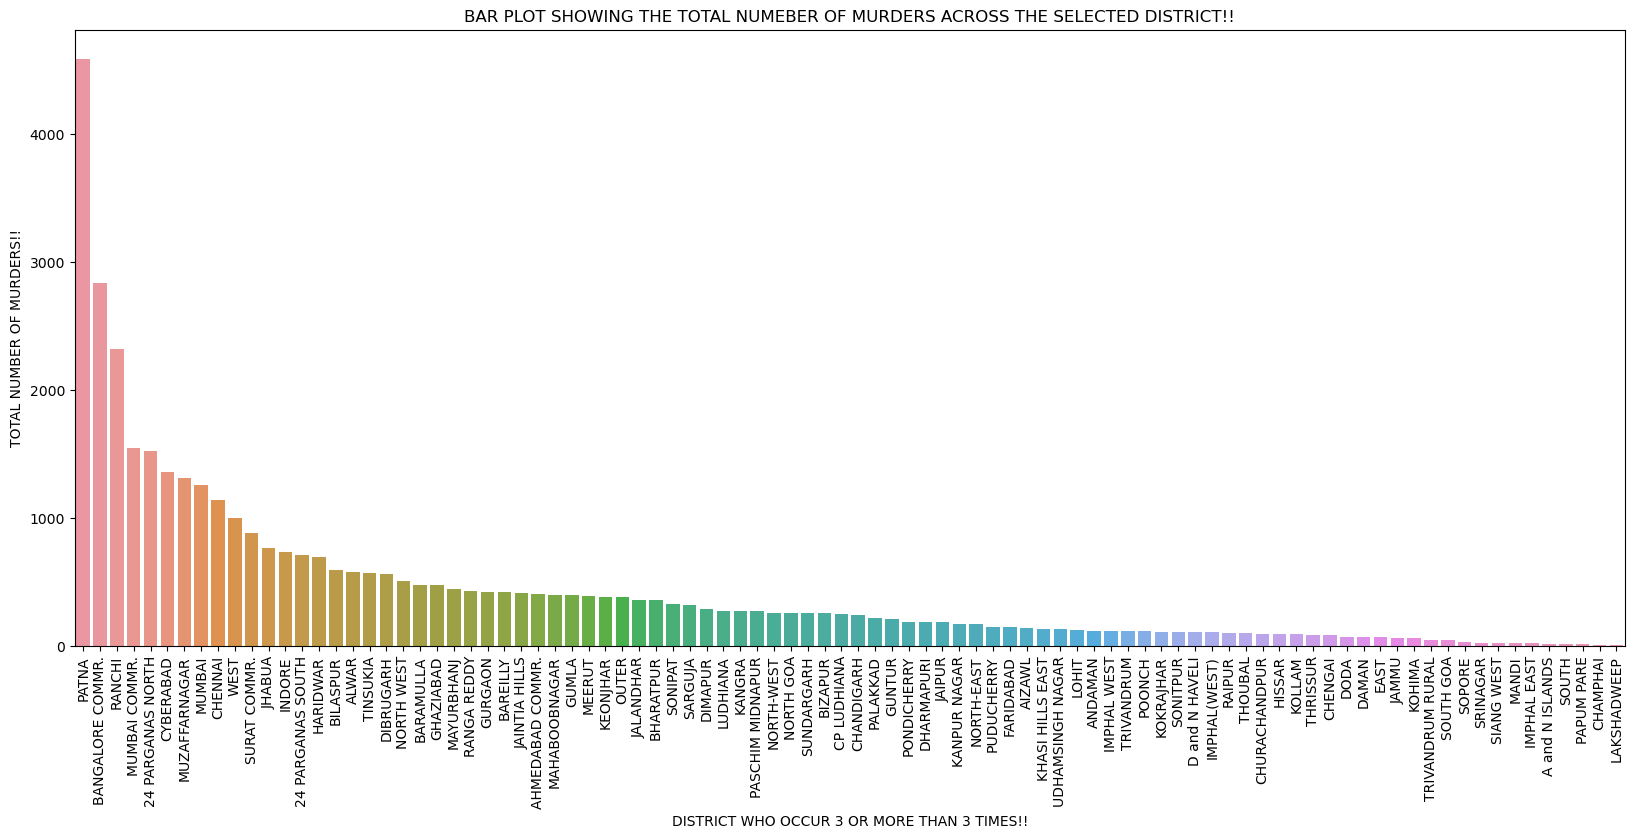

In [69]:
plt.figure(figsize=(20,8))
sns.barplot(x=df['DISTRICT'],y=df['TOTAL MURDER'])
plt.xticks(rotation=90)
plt.xlabel("DISTRICT WHO OCCUR 3 OR MORE THAN 3 TIMES!!")
plt.ylabel("TOTAL NUMBER OF MURDERS!!")
plt.title("BAR PLOT SHOWING THE TOTAL NUMEBER OF MURDERS ACROSS THE SELECTED DISTRICT!!")
plt.show()

From the above we can see, "PATNA" have the highest number of murders recorded across all the selected Districs.
LAKSHDWEEP reprts the lowest numbers among all.